# Imports

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Import Dataset

In [3]:
cal = fetch_california_housing()
X = pd.DataFrame(cal.data, columns=cal.feature_names)
y = pd.Series(cal.target)

# Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Create Model

In [5]:
models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge()
}

# Training Models

In [11]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f'==={name}===')
    print(f'{name} - Train MAE: {train_mae}')
    print(f'{name} - Test MAE: {test_mae}')
    print(f'{name} - Train MSE: {train_mse}')
    print(f'{name} - Test MSE: {test_mse}')
        
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as file:
        pickle.dump(model, file)        

===Random Forest Regressor===
Random Forest Regressor - Train MAE: 0.12214563147407984
Random Forest Regressor - Test MAE: 0.3275993549176358
Random Forest Regressor - Train MSE: 0.03536180936744548
Random Forest Regressor - Test MSE: 0.2557259876588585
===Linear Regression===
Linear Regression - Train MAE: 0.5286283596581934
Linear Regression - Test MAE: 0.5332001304956565
Linear Regression - Train MSE: 0.5179331255246697
Linear Regression - Test MSE: 0.5558915986952437
===Ridge Regression===
Ridge Regression - Train MAE: 0.5286393234710571
Ridge Regression - Test MAE: 0.5332039182571147
Ridge Regression - Train MSE: 0.5179332149226819
Ridge Regression - Test MSE: 0.5558034669932211


# Testing the best model

In [12]:
chosen_model =  models['Random Forest Regressor']
y_test_pred = chosen_model.predict(X_test)

# Visualisation

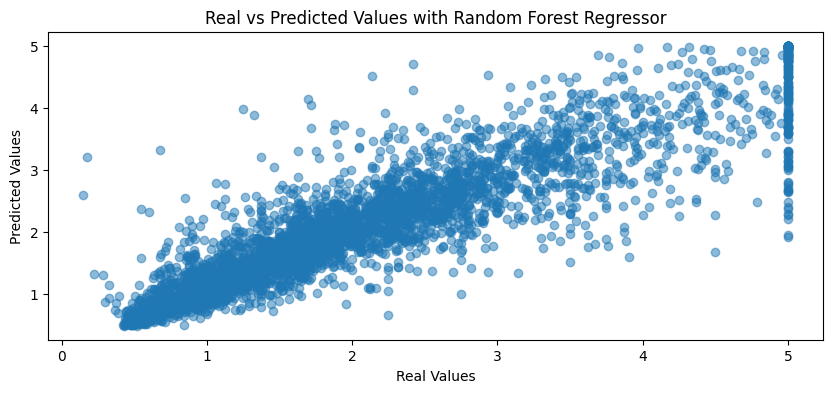

In [14]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values with Random Forest Regressor')
plt.show()